**Metoda najmniejszych kwadratów**

In [17]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd

**Zadanie 1.**

In [18]:
labels_path = "conspect/dataset/breast-cancer.labels"
with open(labels_path, 'r') as file:
    columns = file.read().splitlines()
train_path = "conspect/dataset/breast-cancer-train.dat"
validate_path = "conspect/dataset/breast-cancer-validate.dat"
train = pd.io.parsers.read_csv(train_path, header=None, names=columns)
validate = pd.io.parsers.read_csv(validate_path, header=None, names=columns)

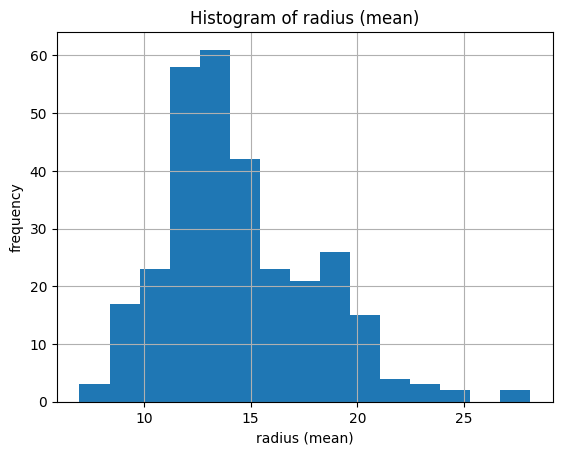

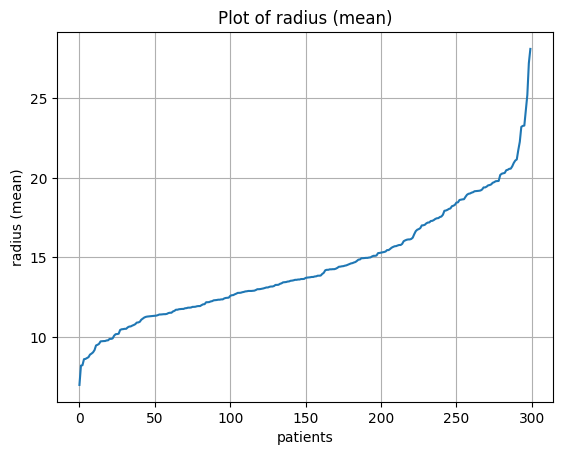

In [19]:
plt.hist(train['radius (mean)'], bins = 15)
plt.title("Histogram of radius (mean)")
plt.xlabel("radius (mean)")
plt.ylabel("frequency")
plt.grid()
plt.show()

plt.plot(train['radius (mean)'].sort_values().reset_index(drop=True))
plt.title("Plot of radius (mean)")
plt.xlabel("patients")
plt.ylabel("radius (mean)")
plt.grid()
plt.show()

In [20]:
# A matrix - Linear

A_lin_train = np.matrix(train.iloc[:, 2:])
A_lin_validate = np.matrix(validate.iloc[:, 2:])

# A matrix - Quadratic

# Train data:
f1, f2, f3, f4 = train.iloc[:, 2], train.iloc[:, 4], train.iloc[:, 5], train.iloc[:, 10]

# linear terms
a1 = np.matrix(pd.concat([f1, f2, f3, f4], axis=1))
# squared terms
a2 = np.square(a1)
# multiplied terms
a3 = np.matrix(pd.concat([f1*f2, f1*f3, f1*f4, f2*f3, f2*f4, f3*f4], axis=1))

A_quad_train = np.concatenate((a1, a2, a3), axis=1)

# Validate data:
f1, f2, f3, f4 = validate.iloc[:, 2], validate.iloc[:, 4], validate.iloc[:, 5], validate.iloc[:, 10]

# linear terms
a1 = np.matrix(pd.concat([f1, f2, f3, f4], axis=1))
# squared terms
a2 = np.square(a1)
# multiplied terms
a3 = np.matrix(pd.concat([f1*f2, f1*f3, f1*f4, f2*f3, f2*f4, f3*f4], axis=1))

A_quad_validate = np.concatenate((a1, a2, a3), axis=1)

# B matrix

b_train = np.array(train.iloc[:, 1])
b_train = np.where(b_train == 'M', 1, -1)
b_validate = np.array(validate.iloc[:, 1])
b_validate = np.where(b_validate == 'M', 1, -1)

In [22]:
# W matrix

# Linear
A = np.matmul(np.transpose(A_lin_train),  A_lin_train)
b = np.matmul(np.transpose(A_lin_train), b_train[:, np.newaxis])
w_lin = scipy.linalg.solve(A, b)

# Quadratic
A = np.matmul(np.transpose(A_quad_train),  A_quad_train)
b = np.matmul(np.transpose(A_quad_train), b_train[:, np.newaxis])
w_quad = scipy.linalg.solve(A, b)

# cond(A^T * A) = cond(A)^2
cond_lin = np.linalg.cond(A_lin_train)**2
cond_quad = np.linalg.cond(A_quad_train)**2
print(cond_lin, cond_quad)

# P vector
p_lin = np.matmul(A_lin_validate, w_lin)
p_lin = np.where(p_lin>0, 1, -1)
p_quad = np.matmul(A_quad_validate, w_quad)
p_quad = np.where(p_quad>0, 1, -1)

# Statistics
False_Positive_lin = np.count_nonzero(np.logical_and(p_lin==1,b_validate[:, np.newaxis]==-1) == True)
False_Negative_lin = np.count_nonzero(np.logical_and(p_lin==-1,b_validate[:, np.newaxis]==1) == True)

print(False_Positive_lin, False_Negative_lin)

False_Positive_quad = np.count_nonzero(np.logical_and(p_quad==1,b_validate[:, np.newaxis]==-1) == True)
False_Negative_quad = np.count_nonzero(np.logical_and(p_quad==-1,b_validate[:, np.newaxis]==1) == True)

print(False_Positive_quad, False_Negative_quad)


1809248222517.8574 9.056816679044991e+17
6 2
15 5


C:\Users\leymk\AppData\Local\Temp\ipykernel_11792\1159413356.py:11: LinAlgWarning: Ill-conditioned matrix (rcond=7.90575e-19): result may not be accurate.
  w_quad = scipy.linalg.solve(A, b)
